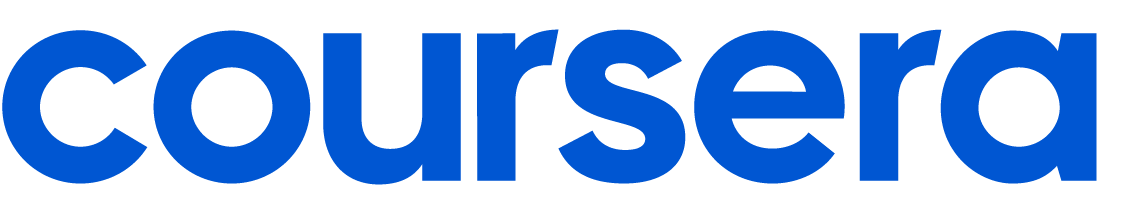

# Welcome to the Data Science Coding Challange!

Test your skills in a real-world coding challenge. Coding Challenges provide CS & DS Coding Competitions with Prizes and achievement badges!

CS & DS learners want to be challenged as a way to evaluate if they’re job ready. So, why not create fun challenges and give winners something truly valuable such as complimentary access to select Data Science courses, or the ability to receive an achievement badge on their Coursera Skills Profile - highlighting their performance to recruiters.

## Introduction

In this challenge, you'll get the opportunity to tackle one of the most industry-relevant machine learning problems with a unique dataset that will put your modeling skills to the test. Financial loan services are leveraged by companies across many industries, from big banks to financial institutions to government loans. One of the primary objectives of companies with financial loan services is to decrease payment defaults and ensure that individuals are paying back their loans as expected. In order to do this efficiently and systematically, many companies employ machine learning to predict which individuals are at the highest risk of defaulting on their loans, so that proper interventions can be effectively deployed to the right audience.

In this challenge, we will be tackling the loan default prediction problem on a very unique and interesting group of individuals who have taken financial loans. 

Imagine that you are a new data scientist at a major financial institution and you are tasked with building a model that can predict which individuals will default on their loan payments. We have provided a dataset that is a sample of individuals who received loans in 2021. 

This financial institution has a vested interest in understanding the likelihood of each individual to default on their loan payments so that resources can be allocated appropriately to support these borrowers. In this challenge, you will use your machine learning toolkit to do just that!

## Understanding the Datasets

### Train vs. Test
In this competition, you’ll gain access to two datasets that are samples of past borrowers of a financial institution that contain information about the individual and the specific loan. One dataset is titled `train.csv` and the other is titled `test.csv`.

`train.csv` contains 70% of the overall sample (255,347 borrowers to be exact) and importantly, will reveal whether or not the borrower has defaulted on their loan payments (the “ground truth”).

The `test.csv` dataset contains the exact same information about the remaining segment of the overall sample (109,435 borrowers to be exact), but does not disclose the “ground truth” for each borrower. It’s your job to predict this outcome!

Using the patterns you find in the `train.csv` data, predict whether the borrowers in `test.csv` will default on their loan payments, or not.

### Dataset descriptions
Both `train.csv` and `test.csv` contain one row for each unique Loan. For each Loan, a single observation (`LoanID`) is included during which the loan was active. 

In addition to this identifier column, the `train.csv` dataset also contains the target label for the task, a binary column `Default` which indicates if a borrower has defaulted on payments.

Besides that column, both datasets have an identical set of features that can be used to train your model to make predictions. Below you can see descriptions of each feature. Familiarize yourself with them so that you can harness them most effectively for this machine learning task!

In [87]:
import pandas as pd
data_descriptions = pd.read_csv('data_descriptions.csv')
pd.set_option('display.max_colwidth', None)
data_descriptions

,Column_name,Column_type,Data_type,Description
0,LoanID,Identifier,string,A unique identifier for each loan.
1,Age,Feature,integer,The age of the borrower.
2,Income,Feature,integer,The annual income of the borrower.
3,LoanAmount,Feature,integer,The amount of money being borrowed.
4,CreditScore,Feature,integer,"The credit score of the borrower, indicating their creditworthiness."
5,MonthsEmployed,Feature,integer,The number of months the borrower has been employed.
6,NumCreditLines,Feature,integer,The number of credit lines the borrower has open.
7,InterestRate,Feature,float,The interest rate for the loan.
8,LoanTerm,Feature,integer,The term length of the loan in months.
9,DTIRatio,Feature,float,"The Debt-to-Income ratio, indicating the borrower's debt compared to their income."


## How to Submit your Predictions to Coursera
Submission Format:

In this notebook you should follow the steps below to explore the data, train a model using the data in `train.csv`, and then score your model using the data in `test.csv`. Your final submission should be a dataframe (call it `prediction_df` with two columns and exactly 109,435 rows (plus a header row). The first column should be `LoanID` so that we know which prediction belongs to which observation. The second column should be called `predicted_probability` and should be a numeric column representing the __likelihood that the borrower will default__.

Your submission will show an error if you have extra columns (beyond `LoanID` and `predicted_probability`) or extra rows. The order of the rows does not matter.

The naming convention of the dataframe and columns are critical for our autograding, so please make sure to use the exact naming conventions of `prediction_df` with column names `LoanID` and `predicted_probability`!

To determine your final score, we will compare your `predicted_probability` predictions to the source of truth labels for the observations in `test.csv` and calculate the [ROC AUC](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html). We choose this metric because we not only want to be able to predict which loans will default, but also want a well-calibrated likelihood score that can be used to target interventions and support most accurately.

## Import Python Modules

First, import the primary modules that will be used in this project. Remember as this is an open-ended project please feel free to make use of any of your favorite libraries that you feel may be useful for this challenge. For example some of the following popular packages may be useful:

- pandas
- numpy
- Scipy
- Scikit-learn
- keras
- maplotlib
- seaborn
- etc, etc

In [88]:
# Import required packages

# Data packages
import pandas as pd
import numpy as np

# Machine Learning / Classification packages
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.dummy import DummyClassifier
import pickle

# Visualization Packages
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [89]:
!pip install xgboost
!pip install -U seaborn

In [90]:
# Import any other packages you may want to use
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier, plot_importance

## Load the Data

Let's start by loading the dataset `train.csv` into a dataframe `train_df`, and `test.csv` into a dataframe `test_df` and display the shape of the dataframes.

In [91]:
train_df = pd.read_csv("train.csv")
print('train_df Shape:', train_df.shape)
train_df.head()

train_df Shape: (255347, 18)


,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [92]:
test_df = pd.read_csv("test.csv")
print('test_df Shape:', test_df.shape)
test_df.head()

test_df Shape: (109435, 17)


,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
0,7RYZGMKJIR,32,131645,43797,802,23,2,6.10,24,0.13,High School,Full-time,Divorced,Yes,No,Other,No
1,JDL5RH07AM,61,134312,18402,369,87,2,12.99,60,0.59,High School,Self-employed,Single,No,No,Business,Yes
2,STAL716Y79,55,115809,151774,563,3,3,5.51,48,0.82,Bachelor's,Full-time,Single,Yes,Yes,Other,Yes
3,SO0KKJ3IQB,58,94970,55789,337,24,1,23.93,36,0.77,Bachelor's,Unemployed,Divorced,No,No,Business,No
4,T99CWTYDCP,63,71727,189798,451,52,3,22.05,48,0.44,PhD,Unemployed,Single,Yes,No,Auto,No


## Explore, Clean, Validate, and Visualize the Data (optional)

Feel free to explore, clean, validate, and visualize the data however you see fit for this competition to help determine or optimize your predictive model. Please note - the final autograding will only be on the accuracy of the `prediction_df` predictions.

In [93]:
# Display basic information about the DataFrame
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

In [94]:
# Display summary statistics of numeric columns
train_df.describe(include='all')

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
count,255347,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347,255347,255347,255347,255347,255347,255347,255347.000000
unique,255347,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,4,3,2,2,5,2,NaN
top,W5ZE8DXY8E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bachelor's,Part-time,Married,Yes,Yes,Business,Yes,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64366,64161,85302,127677,127742,51298,127701,NaN
mean,NaN,43.498306,82499.304597,127578.865512,574.264346,59.541976,2.501036,13.492773,36.025894,0.500212,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.116128
std,NaN,14.990258,38963.013729,70840.706142,158.903867,34.643376,1.117018,6.636443,16.969330,0.230917,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.320379
min,NaN,18.000000,15000.000000,5000.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,31.000000,48825.500000,66156.000000,437.000000,30.000000,2.000000,7.770000,24.000000,0.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
50%,NaN,43.000000,82466.000000,127556.000000,574.000000,60.000000,2.000000,13.460000,36.000000,0.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
75%,NaN,56.000000,116219.000000,188985.000000,712.000000,90.000000,3.000000,19.250000,48.000000,0.700000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000


In [95]:
# Display the first few rows of the DataFrame
train_df.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [96]:
train_df.columns

Index(['LoanID', 'Age', 'Income', 'LoanAmount', 'CreditScore',
       'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm',
       'DTIRatio', 'Education', 'EmploymentType', 'MaritalStatus',
       'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner',
       'Default'],
      dtype='object')

In [97]:
# Check for missing values
print(train_df.isnull().sum())

LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64


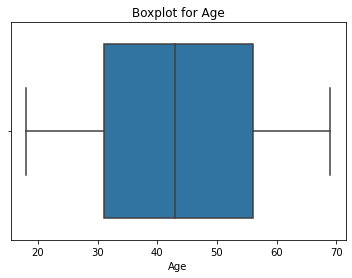

----------------------------------------------------------------------------------


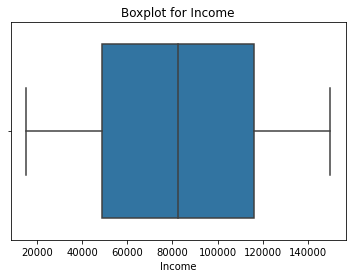

----------------------------------------------------------------------------------


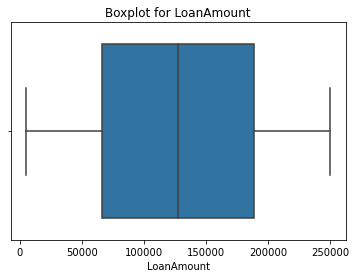

----------------------------------------------------------------------------------


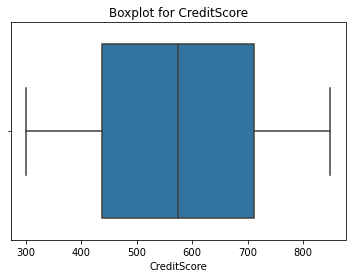

----------------------------------------------------------------------------------


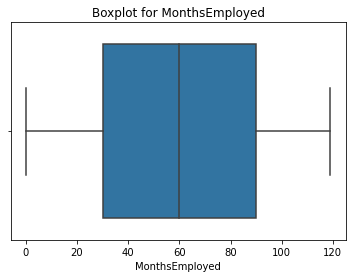

----------------------------------------------------------------------------------


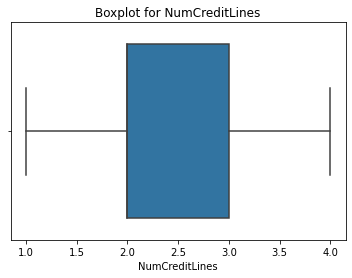

----------------------------------------------------------------------------------


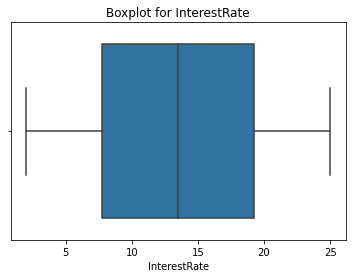

----------------------------------------------------------------------------------


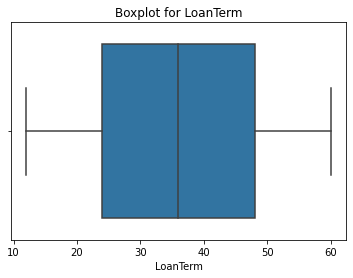

----------------------------------------------------------------------------------


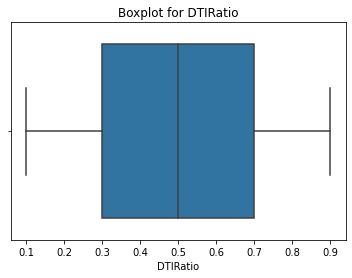

----------------------------------------------------------------------------------


In [98]:
num_cols = ['Age', 'Income', 'LoanAmount', 'CreditScore',
       'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm',
       'DTIRatio']
for col in num_cols:
    sns.boxplot(train_df[col])
    plt.title(f"Boxplot for {col}")
    plt.show()
    print("----------------------------------------------------------------------------------")

In [99]:
train_df["Default"].value_counts()[0]

225694

In [100]:
cat_cols = ['Education', 'EmploymentType', 'MaritalStatus',
       'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner']
for col in cat_cols:
    print(train_df[col].value_counts())
    print("------------------------")

Bachelor's     64366
High School    63903
Master's       63541
PhD            63537
Name: Education, dtype: int64
------------------------
Part-time        64161
Unemployed       63824
Self-employed    63706
Full-time        63656
Name: EmploymentType, dtype: int64
------------------------
Married     85302
Divorced    85033
Single      85012
Name: MaritalStatus, dtype: int64
------------------------
Yes    127677
No     127670
Name: HasMortgage, dtype: int64
------------------------
Yes    127742
No     127605
Name: HasDependents, dtype: int64
------------------------
Business     51298
Home         51286
Education    51005
Other        50914
Auto         50844
Name: LoanPurpose, dtype: int64
------------------------
Yes    127701
No     127646
Name: HasCoSigner, dtype: int64
------------------------


In [101]:
binary_cols = ['HasMortgage', 'HasDependents', 'HasCoSigner']
for col in binary_cols:
    train_df[col] = train_df[col].map({"Yes":1, "No":0})

In [102]:
train_df.drop("LoanID", axis=1, inplace=True)

In [103]:
train_df = pd.get_dummies(train_df)

In [104]:
train_df.dtypes

Age                               int64
Income                            int64
LoanAmount                        int64
CreditScore                       int64
MonthsEmployed                    int64
NumCreditLines                    int64
InterestRate                    float64
LoanTerm                          int64
DTIRatio                        float64
HasMortgage                       int64
HasDependents                     int64
HasCoSigner                       int64
Default                           int64
Education_Bachelor's              uint8
Education_High School             uint8
Education_Master's                uint8
Education_PhD                     uint8
EmploymentType_Full-time          uint8
EmploymentType_Part-time          uint8
EmploymentType_Self-employed      uint8
EmploymentType_Unemployed         uint8
MaritalStatus_Divorced            uint8
MaritalStatus_Married             uint8
MaritalStatus_Single              uint8
LoanPurpose_Auto                  uint8


# Training model

In [105]:
X = train_df.drop("Default", axis=1)
y = train_df["Default"]
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42, test_size=0.2)

In [106]:
scoring = {"accuracy", "recall", "f1", "precision"}

rf_param_grid = {
    'n_estimators': [100, 200],  # You can specify different values to search
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
}

num_of_not_defaults = train_df["Default"].value_counts()[0]
num_of_defaults = train_df["Default"].value_counts()[1]

# Define class weights based on the class imbalance
class_weights = {0: 1, 1: (num_of_not_defaults / num_of_defaults)}

rf = RandomForestClassifier(random_state=42, class_weight=class_weights)

In [107]:
xgb_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 4],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0]
}

# Define scale_pos_weight based on the class imbalance
scale_pos_weight = num_of_not_defaults / num_of_defaults  # Ratio of negative to positive samples

xgb = XGBClassifier(objective="binary:logistic", random_state=42, scale_pos_weight=scale_pos_weight)

In [108]:
# Prioritize recall so all potential defaulters are caught
#rf_cv = GridSearchCV(rf, rf_param_grid, scoring=scoring, refit = "recall", cv=5)

#xgb_cv = GridSearchCV(xgb, xgb_param_grid, scoring=scoring, refit = "recall", cv=5)

In [109]:
#%%time
#rf_cv.fit(X_train, y_train)

In [110]:
#%%time
#xgb_cv.fit(X_train, y_train)

In [111]:
#with open("rf_model.pickle", "wb") as file:
    #pickle.dump(rf_cv, file)

#with open("xgb_model.pickle", "wb") as file:
    #pickle.dump(xgb_cv, file)

In [112]:
#with open("rf_model_classWeight_param.pickle", "wb") as file:
    #pickle.dump(rf_cv, file)
#with open("xgb_model_classWeight_param.pickle", "wb") as file:
    #pickle.dump(xgb_cv, file)

In [113]:
with open("rf_model.pickle", "rb") as file:
    rf_cv_no_class = pickle.load(file)
with open("xgb_model.pickle", "rb") as file:
    xgb_cv_no_class = pickle.load(file)

In [114]:
with open("rf_model_classWeight_param.pickle", "rb") as file:
    rf_cv = pickle.load(file)
with open("xgb_model_classWeight_param.pickle", "rb") as file:
    xgb_cv = pickle.load(file)

In [115]:
print(f"Best recall of the RandomForest model {rf_cv_no_class.best_score_:.4f}\n")
print(f"Best recall of the XGBoost model {xgb_cv_no_class.best_score_:.4f}\n")
print(f"Best recall of the RandomForest model with class weight specified {rf_cv.best_score_:.4f}\n")
print(f"Best recall of the XGBoost model with class weight specified {xgb_cv.best_score_:.4f}\n")

Best recall of the RandomForest model 0.0322

Best recall of the XGBoost model 0.0716

Best recall of the RandomForest model with class weight specified 0.6041

Best recall of the XGBoost model with class weight specified 0.6809



In [116]:
y_train.value_counts(normalize=True)

0    0.883873
1    0.116127
Name: Default, dtype: float64

In [117]:
rf_best = rf_cv.best_estimator_
xgb_best = xgb_cv.best_estimator_

In [118]:
y_hat_rf = rf_best.predict(X_test)

In [119]:
y_hat_xgb = xgb_best.predict(X_test)

In [120]:
print(accuracy_score(y_hat_rf, y_test))
print(accuracy_score(y_hat_xgb, y_test))

0.7281182690424907
0.688995496377521


In [121]:
rf_best = rf_cv_no_class.best_estimator_
xgb_best = xgb_cv_no_class.best_estimator_

y_hat_rf = rf_best.predict(X_test)
y_hat_xgb = xgb_best.predict(X_test)

print("Accuracy: ")
print(accuracy_score(y_hat_rf, y_test))
print(accuracy_score(y_hat_xgb, y_test))

print("Recall: ")
print(recall_score(y_hat_rf, y_test))
print(recall_score(y_hat_xgb, y_test))

print("Precision: ")
print(precision_score(y_hat_rf, y_test))
print(precision_score(y_hat_xgb, y_test))

print("F1: ")
print(f1_score(y_hat_rf, y_test))
print(f1_score(y_hat_xgb, y_test))

Accuracy: 
0.8856471509692578
0.8866849422361465
Recall: 
0.657439446366782
0.6031518624641834
Precision: 
0.032035069971337045
0.07098297083122576
F1: 
0.061093247588424444
0.12701764972092322


In [122]:
y_hat_xgb = xgb_cv.best_estimator_.predict(X_test)
print(f1_score(y_hat_xgb, y_test))

0.34005069181867287


Even though the model with class weights specified performs better on validation data it seems to overfit it and consequently shows worse results when making predictions on the new unseen data. Nevertheless, we choose thew model with no class weight specified as it scores the best in accuracy which is the metric of the evaluation on Coursera competition(counterintuitive to the expected domain's priority of capturing all possible defaulters though). 

Taking all of this into account we choose the RandomForest model to predict on data for submission

# Making predictions on the test data

In [123]:
submit_examp = pd.read_csv("prediction_submission.csv")
submit_examp.head()

,LoanID,predicted_probability
0,7RYZGMKJIR,0.0
1,JDL5RH07AM,0.0
2,STAL716Y79,0.0
3,SO0KKJ3IQB,0.0
4,T99CWTYDCP,0.0


In [124]:
test_df.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
0,7RYZGMKJIR,32,131645,43797,802,23,2,6.10,24,0.13,High School,Full-time,Divorced,Yes,No,Other,No
1,JDL5RH07AM,61,134312,18402,369,87,2,12.99,60,0.59,High School,Self-employed,Single,No,No,Business,Yes
2,STAL716Y79,55,115809,151774,563,3,3,5.51,48,0.82,Bachelor's,Full-time,Single,Yes,Yes,Other,Yes
3,SO0KKJ3IQB,58,94970,55789,337,24,1,23.93,36,0.77,Bachelor's,Unemployed,Divorced,No,No,Business,No
4,T99CWTYDCP,63,71727,189798,451,52,3,22.05,48,0.44,PhD,Unemployed,Single,Yes,No,Auto,No


In [125]:
test_df.isna().sum()

LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
dtype: int64

In [126]:
loan_ids = test_df["LoanID"]

In [127]:
binary_cols = ['HasMortgage', 'HasDependents', 'HasCoSigner']
for col in binary_cols:
    test_df[col] = test_df[col].map({"Yes":1, "No":0})

test_df.drop("LoanID", axis=1, inplace=True)

test_df = pd.get_dummies(test_df)

test_df.dtypes

Age                               int64
Income                            int64
LoanAmount                        int64
CreditScore                       int64
MonthsEmployed                    int64
NumCreditLines                    int64
InterestRate                    float64
LoanTerm                          int64
DTIRatio                        float64
HasMortgage                       int64
HasDependents                     int64
HasCoSigner                       int64
Education_Bachelor's              uint8
Education_High School             uint8
Education_Master's                uint8
Education_PhD                     uint8
EmploymentType_Full-time          uint8
EmploymentType_Part-time          uint8
EmploymentType_Self-employed      uint8
EmploymentType_Unemployed         uint8
MaritalStatus_Divorced            uint8
MaritalStatus_Married             uint8
MaritalStatus_Single              uint8
LoanPurpose_Auto                  uint8
LoanPurpose_Business              uint8


In [128]:
predictions = rf_best.predict(test_df)

In [129]:
submit_df = pd.DataFrame({"LoanID":loan_ids, "predicted_probability":predictions})

In [130]:
submit_df

,LoanID,predicted_probability
0,7RYZGMKJIR,0
1,JDL5RH07AM,0
2,STAL716Y79,0
3,SO0KKJ3IQB,0
4,T99CWTYDCP,0
...,...,...
109430,V12FM6UKMS,0
109431,GLRB9P0CQO,0
109432,RWCJ3SL2J6,0
109433,2Z9IZS4OMY,0


In [132]:
submit_df.to_csv("prediction_submissionBRABRBARBA.csv")

# --------------------------- it does work until here for sure!

ValueError: could not convert string to float: 'I38PQUQS96'

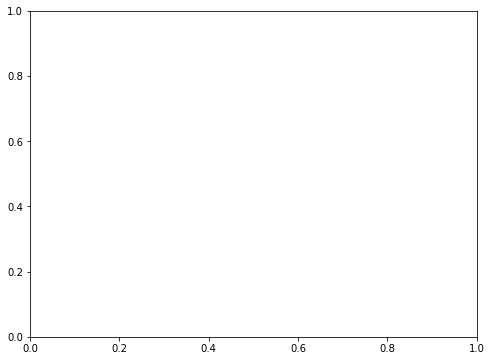

In [13]:
# Visualize the distribution of a numeric column (e.g., 'age')
plt.figure(figsize=(8, 6))
sns.kdeplot(data = train_df, x='Age', bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [16]:
train_df.corr()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
Age,1.000000,-0.001244,-0.002213,-0.000548,-0.000341,-0.000890,-0.001127,0.000263,-0.004689,-0.167783
Income,-0.001244,1.000000,-0.000865,-0.001430,0.002675,-0.002016,-0.002303,-0.000998,0.000205,-0.099119
LoanAmount,-0.002213,-0.000865,1.000000,0.001261,0.002817,0.000794,-0.002291,0.002538,0.001122,0.086659
CreditScore,-0.000548,-0.001430,0.001261,1.000000,0.000613,0.000016,0.000436,0.001130,-0.001039,-0.034166
MonthsEmployed,-0.000341,0.002675,0.002817,0.000613,1.000000,0.001267,0.000096,-0.001166,0.001765,-0.097374
NumCreditLines,-0.000890,-0.002016,0.000794,0.000016,0.001267,1.000000,-0.000297,-0.000226,-0.000586,0.028330
InterestRate,-0.001127,-0.002303,-0.002291,0.000436,0.000096,-0.000297,1.000000,0.000892,0.000575,0.131273
LoanTerm,0.000263,-0.000998,0.002538,0.001130,-0.001166,-0.000226,0.000892,1.000000,0.002273,0.000545
DTIRatio,-0.004689,0.000205,0.001122,-0.001039,0.001765,-0.000586,0.000575,0.002273,1.000000,0.019236
Default,-0.167783,-0.099119,0.086659,-0.034166,-0.097374,0.028330,0.131273,0.000545,0.019236,1.000000


In [14]:
# Visualize a categorical variable (e.g., 'gender')
plt.figure(figsize=(8, 6))
sns.countplot(x='gender', data=train_df)
plt.title('Count of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

ValueError: Could not interpret input 'gender'

<Figure size 576x432 with 0 Axes>

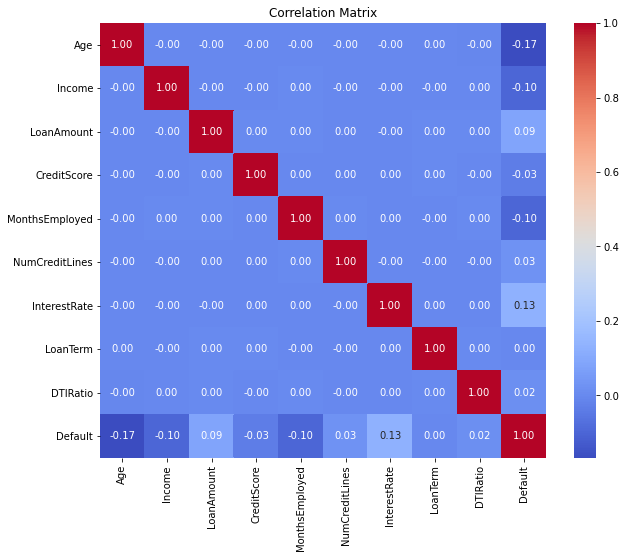

In [15]:
# Create a correlation matrix and visualize it as a heatmap
correlation_matrix = train_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [17]:
# Pairplot to visualize relationships between numeric variables
sns.pairplot(train_df[['age', 'income', 'education']], diag_kind='kde')
plt.show()

KeyError: "None of [Index(['age', 'income', 'education'], dtype='object')] are in the [columns]"

## Make predictions (required)

Remember you should create a dataframe named `prediction_df` with exactly 109,435 entries plus a header row attempting to predict the likelihood of borrowers to default on their loans in `test_df`. Your submission will throw an error if you have extra columns (beyond `LoanID` and `predicted_probaility`) or extra rows.

The file should have exactly 2 columns:
`LoanID` (sorted in any order)
`predicted_probability` (contains your numeric predicted probabilities between 0 and 1, e.g. from `estimator.predict_proba(X, y)[:, 1]`)

The naming convention of the dataframe and columns are critical for our autograding, so please make sure to use the exact naming conventions of `prediction_df` with column names `LoanID` and `predicted_probability`!

### Example prediction submission:

The code below is a very naive prediction method that simply predicts loan defaults using a Dummy Classifier. This is used as just an example showing the submission format required. Please change/alter/delete this code below and create your own improved prediction methods for generating `prediction_df`.

**PLEASE CHANGE CODE BELOW TO IMPLEMENT YOUR OWN PREDICTIONS**

In [18]:
### PLEASE CHANGE THIS CODE TO IMPLEMENT YOUR OWN PREDICTIONS

# Fit a dummy classifier on the feature columns in train_df:
dummy_clf = DummyClassifier(strategy="stratified")
dummy_clf.fit(train_df.drop(['LoanID', 'Default'], axis=1), train_df.Default)

DummyClassifier(constant=None, random_state=None, strategy='stratified')

In [19]:
### PLEASE CHANGE THIS CODE TO IMPLEMENT YOUR OWN PREDICTIONS

# Use our dummy classifier to make predictions on test_df using `predict_proba` method:
predicted_probability = dummy_clf.predict_proba(test_df.drop(['LoanID'], axis=1))[:, 1]

In [20]:
### PLEASE CHANGE THIS CODE TO IMPLEMENT YOUR OWN PREDICTIONS

# Combine predictions with label column into a dataframe
prediction_df = pd.DataFrame({'LoanID': test_df[['LoanID']].values[:, 0],
                             'predicted_probability': predicted_probability})

In [24]:
prediction_df['predicted_probability'].value_counts()

0.0    96617
1.0    12818
Name: predicted_probability, dtype: int64

In [ ]:
### PLEASE CHANGE THIS CODE TO IMPLEMENT YOUR OWN PREDICTIONS

# View our 'prediction_df' dataframe as required for submission.
# Ensure it should contain 104,480 rows and 2 columns 'CustomerID' and 'predicted_probaility'
print(prediction_df.shape)
prediction_df.head(10)

**PLEASE CHANGE CODE ABOVE TO IMPLEMENT YOUR OWN PREDICTIONS**

## Final Tests - **IMPORTANT** - the cells below must be run prior to submission

Below are some tests to ensure your submission is in the correct format for autograding. The autograding process accepts a csv `prediction_submission.csv` which we will generate from our `prediction_df` below. Please run the tests below an ensure no assertion errors are thrown.

In [ ]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

# Writing to csv for autograding purposes
prediction_df.to_csv("prediction_submission.csv", index=False)
submission = pd.read_csv("prediction_submission.csv")

assert isinstance(submission, pd.DataFrame), 'You should have a dataframe named prediction_df.'

In [ ]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.columns[0] == 'LoanID', 'The first column name should be CustomerID.'
assert submission.columns[1] == 'predicted_probability', 'The second column name should be predicted_probability.'

In [ ]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.shape[0] == 109435, 'The dataframe prediction_df should have 109435 rows.'

In [ ]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.shape[1] == 2, 'The dataframe prediction_df should have 2 columns.'

In [ ]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

## This cell calculates the auc score and is hidden. Submit Assignment to see AUC score.

## SUBMIT YOUR WORK!

Once we are happy with our `prediction_df` and `prediction_submission.csv` we can now submit for autograding! Submit by using the blue **Submit Assignment** at the top of your notebook. Don't worry if your initial submission isn't perfect as you have multiple submission attempts and will obtain some feedback after each submission!